In [1]:
from utils import chords
import torch

ValueError: attempted relative import beyond top-level package

In [2]:
chords = chords.Chords()

In [8]:
chords.chord('D#')

(3, 0, array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]), True)

In [13]:
chords.chord('C:min')

(0, 0, array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]), False)

In [14]:
crds = chords.load_chords('/home/sake/psycho_separated_drumless/no_drums.lab')

In [15]:
crds

array([(  0.   ,   0.463, (-1, -1, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], False)),
       (  0.463,   3.889, ( 3,  0, [1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],  True)),
       (  3.889,   7.315, ( 7,  0, [1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],  True)),
       (  7.315,  10.833, ( 0,  0, [1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0], False)),
       ( 10.833,  14.167, ( 8,  0, [1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],  True)),
       ( 14.167,  17.778, ( 3,  0, [1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],  True)),
       ( 17.778,  20.   , ( 7,  0, [1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0], False)),
       ( 20.   ,  20.37 , ( 3,  0, [1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],  True)),
       ( 20.37 ,  20.926, ( 7,  0, [1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0], False)),
       ( 20.926,  24.537, ( 0,  0, [1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0], False)),
       ( 24.537,  27.778, ( 8,  0, [1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],  True)),
       ( 27.778,  32.963, ( 3,  0, [1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],  True)),
       ( 32.963,

In [17]:
df = chords.get_converted_chord('/home/sake/psycho_separated_drumless/no_drums.lab')
df

,root,is_major,chord_id,start,end
0,-1,False,24,0.000000,0.463000
1,3,True,6,0.463000,3.889000
2,7,True,14,3.889000,7.315000
3,0,False,1,7.315000,10.833000
4,8,True,16,10.833000,14.167000
...,...,...,...,...,...
81,7,True,14,196.759003,199.352005
82,0,False,1,199.352005,202.778000
83,8,True,16,202.778000,206.203995
84,3,True,6,206.203995,208.240997


In [19]:
chords.pitch('D#')

3

In [39]:
crds[1]

(0.463, 3.889, (3, 0, [1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0], True))

In [27]:
crds[1][2]

(3, 0, [1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0], True)

In [38]:
torch.concat([torch.Tensor(crds[1][2][2])[-crds[1][2][0]:],torch.Tensor(crds[1][2][2])[:-crds[1][2][0]]])

tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.])

In [40]:
crds[1][0], crds[1][1]

(0.463, 3.889)

In [43]:
timebin = 30/235

In [46]:
round(crds[0][0]/timebin), round(crds[0][1]/timebin)

(0, 4)

In [47]:
round(crds[1][0]/timebin), round(crds[1][1]/timebin)

(4, 30)

In [48]:
round(crds[2][0]/timebin), round(crds[2][1]/timebin)

(30, 57)

In [50]:
for i in range(12):
    print(round(crds[i][0]/timebin), round(crds[i][1]/timebin))

0 4
4 30
30 57
57 85
85 111
111 139
139 157
157 160
160 164
164 192
192 218
218 258


In [52]:
chroma = torch.zeros([235,12])

In [64]:
crds[0]

(0., 0.463, (-1, -1, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], False))

In [74]:
count = 0
for crd in crds:
    if count >= 235: 
        break
    if crd[2][0] == -1:
        multihot = torch.Tensor(crd[2][2])
    else:
        multihot = torch.concat([torch.Tensor(crd[2][2])[-crd[2][0]:],torch.Tensor(crd[2][2])[:-crd[2][0]]])
    start_bin = round(crd[0]/timebin)
    end_bin = round(crd[1]/timebin)
    for j in range(start_bin,end_bin):
        if count >= 235: 
            break
        chroma[j]=multihot
        count += 1

In [70]:
import matplotlib.pyplot as plt

In [75]:
chroma

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.]])

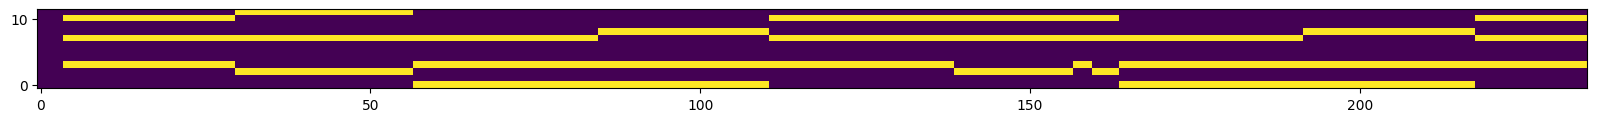

In [77]:
plt.figure(figsize = (20,2))
plt.imshow(chroma.T, origin='lower', interpolation='nearest')